PRÁCTICA CLASIFICACIÓN ML DEPÓSITOS

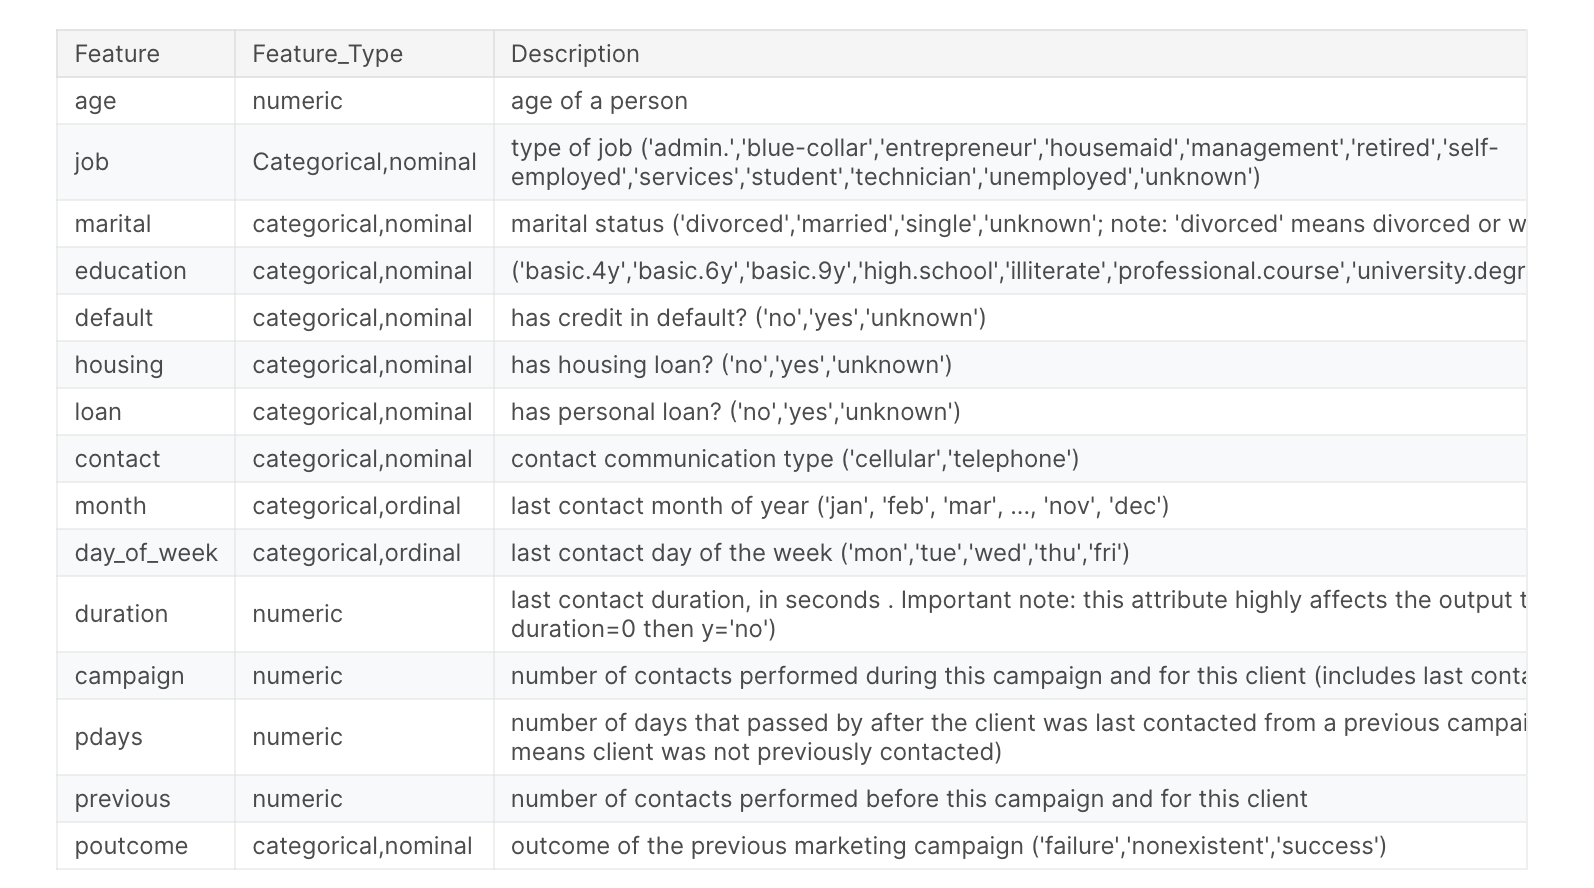

# Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from joblib import dump, load
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Cargar datos

In [4]:
df=pd.read_csv('depositos.csv',sep=',')
print(df.shape)
df.sample(4)

(32950, 16)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
31399,30,admin.,married,university.degree,no,yes,no,telephone,jul,wed,717,8,999,0,nonexistent,no
237,51,admin.,married,high.school,no,no,yes,telephone,jun,thu,222,1,999,0,nonexistent,no
11411,28,services,single,high.school,no,yes,no,cellular,may,tue,194,4,999,0,nonexistent,no
8625,32,technician,married,professional.course,no,yes,no,cellular,aug,wed,641,1,999,0,nonexistent,yes


In [5]:
df.shape

(32950, 16)

In [6]:
df.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


# Data Cleaning

# Tratamos la variable a predecir porque en este caso es yes/no

In [9]:
df['y'].value_counts()

y
no     29238
yes     3712
Name: count, dtype: int64

In [10]:
df['clase']=1*(df['y']=='yes')
df.drop(columns='y',inplace=True)
df.sample()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,clase
17210,38,blue-collar,single,basic.6y,no,yes,yes,cellular,jul,thu,95,1,999,0,nonexistent,0


In [11]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,clase
19609,38,blue-collar,married,high.school,unknown,yes,no,cellular,may,wed,839,2,7,1,success,1
26245,33,services,married,high.school,no,no,no,cellular,jul,tue,272,1,999,0,nonexistent,0
16449,57,technician,married,professional.course,no,yes,no,telephone,may,mon,483,2,999,0,nonexistent,1
23887,39,admin.,married,high.school,no,unknown,unknown,telephone,may,mon,185,4,999,0,nonexistent,0
10584,32,admin.,single,high.school,unknown,yes,no,cellular,jul,mon,141,2,999,0,nonexistent,0


# EDA

https://matplotlib.org/stable/gallery/index.html

TypeError: unhashable type: 'numpy.ndarray'

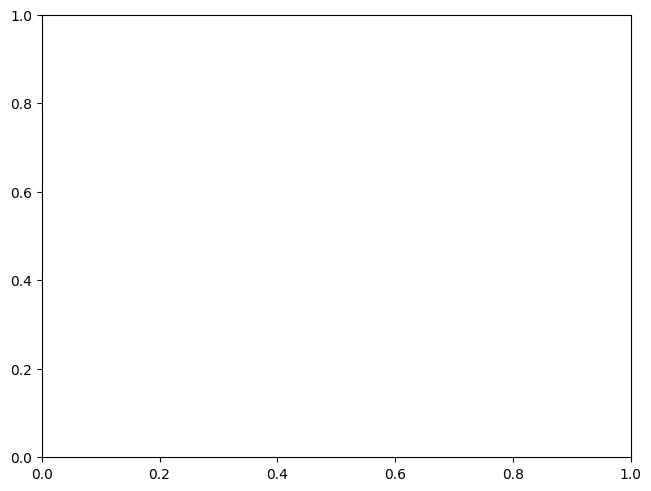

In [25]:
import matplotlib.pyplot as plt
import numpy as np

species = ("housing","marital","job")
penguin_means = {
    'Viviendo': (df.groupby("housing")["duration"]),
    'Casado': (df.groupby("marital")["duration"]),
    'Trabajo': (df.groupby("job")["duration"])
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

In [1]:
df.sample(5)

NameError: name 'df' is not defined

# Preprocesado


## Ordinal encoder

## OneHot encoder

# Evaluación de posibles modelos

### Separar las features del target

### Construcción KFold con 30 folds

In [ ]:
mi_kfold=KFold(n_splits=30)

### 1.1 Logistic Regression

### 1.2 Decision Tree

### 1.3 Random Forest

In [ ]:
dict={"Logistic Regression":metricas_LR, "DecisionTree":metricas_DT, "RandomForest":metricas_RF}
Resultados=pd.DataFrame(dict,index=["Acuracy","Precision","Recall","F1"])
Resultados

CREACIÓN MODELO FINAL. DECISION TREE

USO DEL MODELO